# import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv("attendance.csv")

# Display the first few rows of the dataset to understand its structure
df.head()

,team,team_name,year,total,home,away,week,weekly_attendance
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434.0
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009.0
2,Arizona,Cardinals,2000,893926,387475,506451,3,NaN
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801.0
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985.0


# EDA

In [3]:
#Dimention/Size of dataset
df.shape

(10846, 8)

In [4]:
# Summary statistics of the dataset
summary_statistics = df.describe(include='all')
summary_statistics

,team,team_name,year,total,home,away,week,weekly_attendance
count,10846,10846,10846.000000,1.084600e+04,10846.000000,10846.000000,10846.000000,10208.000000
unique,32,32,NaN,NaN,NaN,NaN,NaN,NaN
top,New York,Cardinals,NaN,NaN,NaN,NaN,NaN,NaN
freq,680,340,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2009.528213,1.080910e+06,540455.012539,540455.012539,9.000000,67556.876567
std,NaN,NaN,5.753415,7.287697e+04,66774.652550,25509.325673,4.899205,9022.015325
min,NaN,NaN,2000.000000,7.606440e+05,202687.000000,450295.000000,1.000000,23127.000000
25%,NaN,NaN,2005.000000,1.040509e+06,504360.000000,524974.000000,5.000000,63245.500000
50%,NaN,NaN,2010.000000,1.081090e+06,543185.000000,541757.000000,9.000000,68334.000000
75%,NaN,NaN,2015.000000,1.123230e+06,578342.000000,557741.000000,13.000000,72544.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10846 entries, 0 to 10845
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   team               10846 non-null  object 
 1   team_name          10846 non-null  object 
 2   year               10846 non-null  int64  
 3   total              10846 non-null  int64  
 4   home               10846 non-null  int64  
 5   away               10846 non-null  int64  
 6   week               10846 non-null  int64  
 7   weekly_attendance  10208 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 678.0+ KB


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

,0
team,0
team_name,0
year,0
total,0
home,0
away,0
week,0
weekly_attendance,638


In [7]:
# Handle missing values in 'weekly_attendance' by filling with median
df['weekly_attendance'].fillna(df['weekly_attendance'].median(), inplace=True)

<ipython-input-7-05b4ab4b89ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weekly_attendance'].fillna(df['weekly_attendance'].median(), inplace=True)


In [ ]:
# Select all numeric features in the dataset
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Define the number of rows and columns for the grid
n = len(numerical_features)
cols = 3  # Number of columns in the grid
rows = (n // cols) + (n % cols > 0)  # Calculate rows needed

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each numerical feature and create a histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=False, bins=10, color='blue', ax=axes[i],
                 element='bars', binwidth=1)  # Adjust binwidth as needed
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i].set_xlabel(feature, fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=9)

    # Set x-ticks for Likert-scale features (if applicable)
    if df[feature].nunique() <= 5:  # Adjust for discrete features
        axes[i].set_xticks([1, 2, 3, 4, 5])

# Hide any unused subplots (if number of features is not a multiple of grid columns)
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing to prevent overlap
plt.tight_layout()

plt.show()


# preprocessing

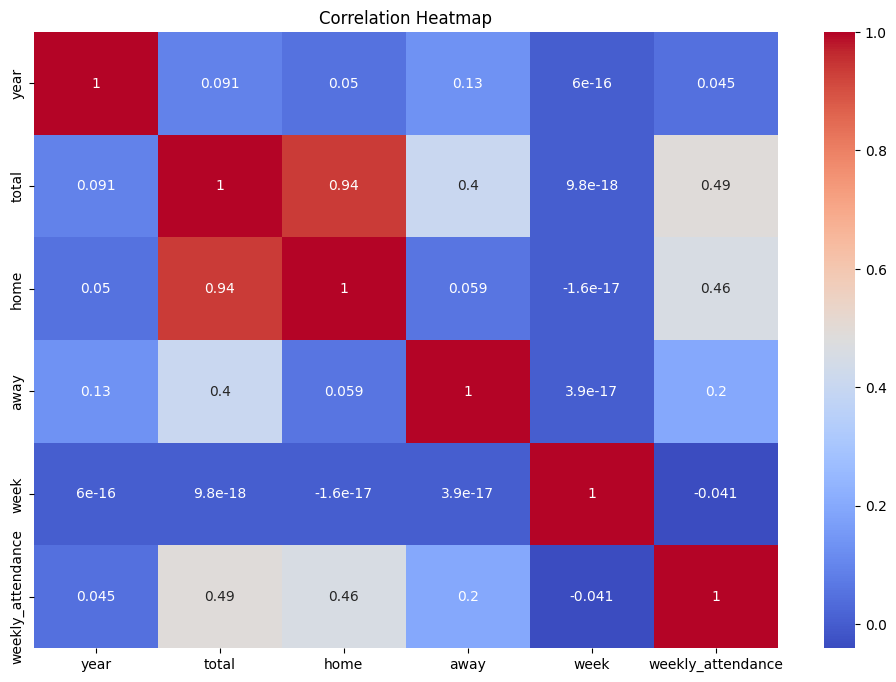

In [33]:
plt.figure(figsize=(12, 8))

numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [34]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns


In [35]:
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
columns_to_drop = ['week', 'year', 'team_encoded', 'team_name_encoded']
existing_columns = [col for col in columns_to_drop if col in df_encoded.columns]
df_reduced = df_encoded.drop(existing_columns, axis=1)


In [ ]:
X = df_reduced.drop('total', axis=1)
y = df_reduced['total']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implimention

In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)


In [25]:

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = mean_squared_error(y_test, y_pred_rf) ** 0.5
r2 = r2_score(y_test, y_pred_rf)

print("🔍 Performance of Random Forest Regressor:")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


🔍 Performance of Random Forest Regressor:
Mean Absolute Error: 3.2022027649772395
Root Mean Squared Error: 27.194217732167363
R-squared: 0.9999998482552004


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# K-Nearest Neighbors
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

#  Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

print("🔍 Performance Comparison:")
print(f"Random Forest: MAE={mae_rf}, RMSE={rmse_rf}, R2={r2_rf}")
print(f"KNN: MAE={mae_knn}, RMSE={rmse_knn}, R2={r2_knn}")
print(f"Linear Regression: MAE={mae_lr}, RMSE={rmse_lr}, R2={r2_lr}")

In [1]:

new_data = pd.DataFrame({
    'team_name_encoded': [0],  # استبدلها برمز فريق صالح
    'total': [500000],         # إجمالي الحضور (مثال)
    'home': [250000],          # الحضور المنزلي (مثال)
    'away': [250000],          # الحضور الخارجي (مثال)
    'week': [10]               # رقم الأسبوع (مثال)
})

# تحويل البيانات باستخدام المقياس الذي استخدمته لتوحيد البيانات
new_data_scaled = scaler.transform(new_data)  # تأكد من تعريف scaler مسبقاً

# التنبؤ باستخدام النموذج
predicted_attendance = rf.predict(new_data_scaled)
print(f"Predicted Weekly Attendance: {predicted_attendance[0]}")

NameError: name 'pd' is not defined